In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart_disease_uci.csv')
df = data.copy()

# Data Exploration

In [3]:
df.head()

# id here does not support us with any additional info
# dataset is also irrelative column

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
list(df.columns)

['id',
 'age',
 'sex',
 'dataset',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [5]:
# let's take a look at the data in detail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
# checking for null values
df.isnull().sum()
# column ca has alot of null values and column thal too


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [7]:
# checking for dupliacted values
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe().round() # numerical features only

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.0,920.0,861.0,890.0,865.0,858.0,309.0,920.0
mean,460.0,54.0,132.0,199.0,138.0,1.0,1.0,1.0
std,266.0,9.0,19.0,111.0,26.0,1.0,1.0,1.0
min,1.0,28.0,0.0,0.0,60.0,-3.0,0.0,0.0
25%,231.0,47.0,120.0,175.0,120.0,0.0,0.0,0.0
50%,460.0,54.0,130.0,223.0,140.0,0.0,0.0,1.0
75%,690.0,60.0,140.0,268.0,157.0,2.0,1.0,2.0
max,920.0,77.0,200.0,603.0,202.0,6.0,3.0,4.0


In [9]:
print(df.oldpeak.nunique()) 
print(df.ca.nunique()) # small number of unique values

53
4


<Axes: >

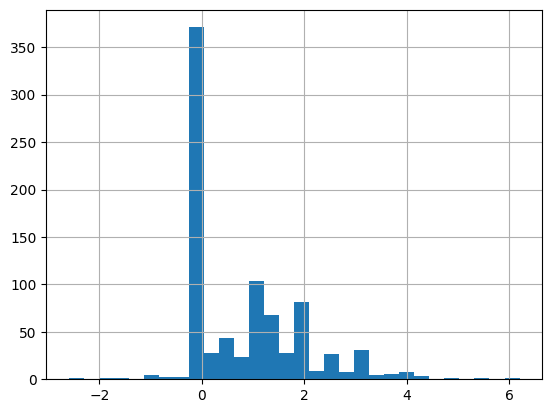

In [10]:
df['oldpeak'].hist(bins = 30) 

In [11]:
df.describe(include='O') # for categorical features

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


In [12]:
df.num.value_counts() 
# we will work on binary classification so 0, 1 the main classes 0 for negative and 1 for positive 

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [13]:
# detecting the columns that needs to be converted from categorical to numerical
for col in df.columns:
    if df[col].nunique() <= 10 and df[col].dtype != 'object':
        print(col)
        print(df[col].unique())

ca
[ 0.  3.  2.  1. nan]
num
[0 2 1 3 4]


<Axes: >

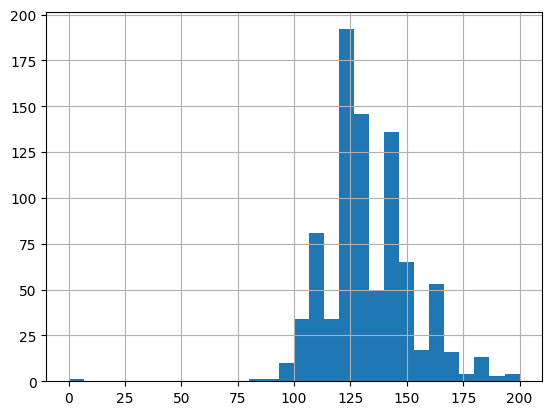

In [14]:
df['trestbps'].hist(bins = 30) 

<Axes: >

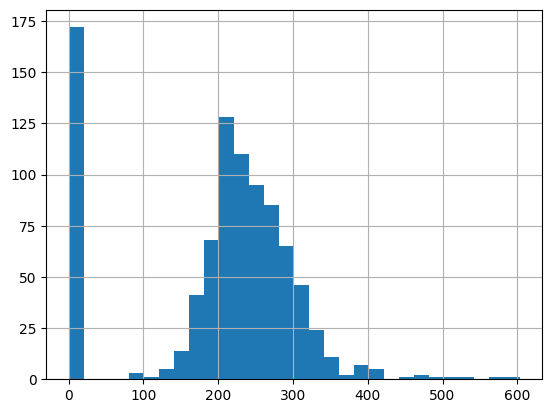

In [15]:
df['chol'].hist(bins = 30)

<Axes: >

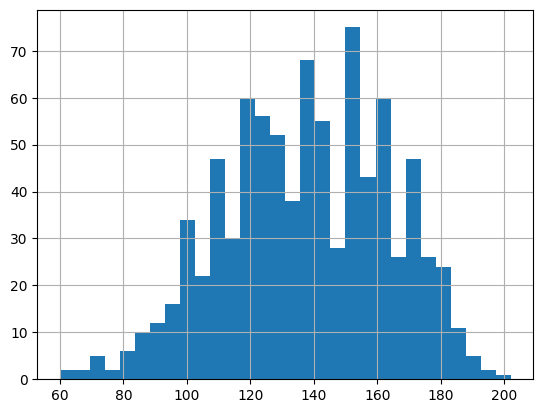

In [16]:
df['thalch'].hist(bins = 30)

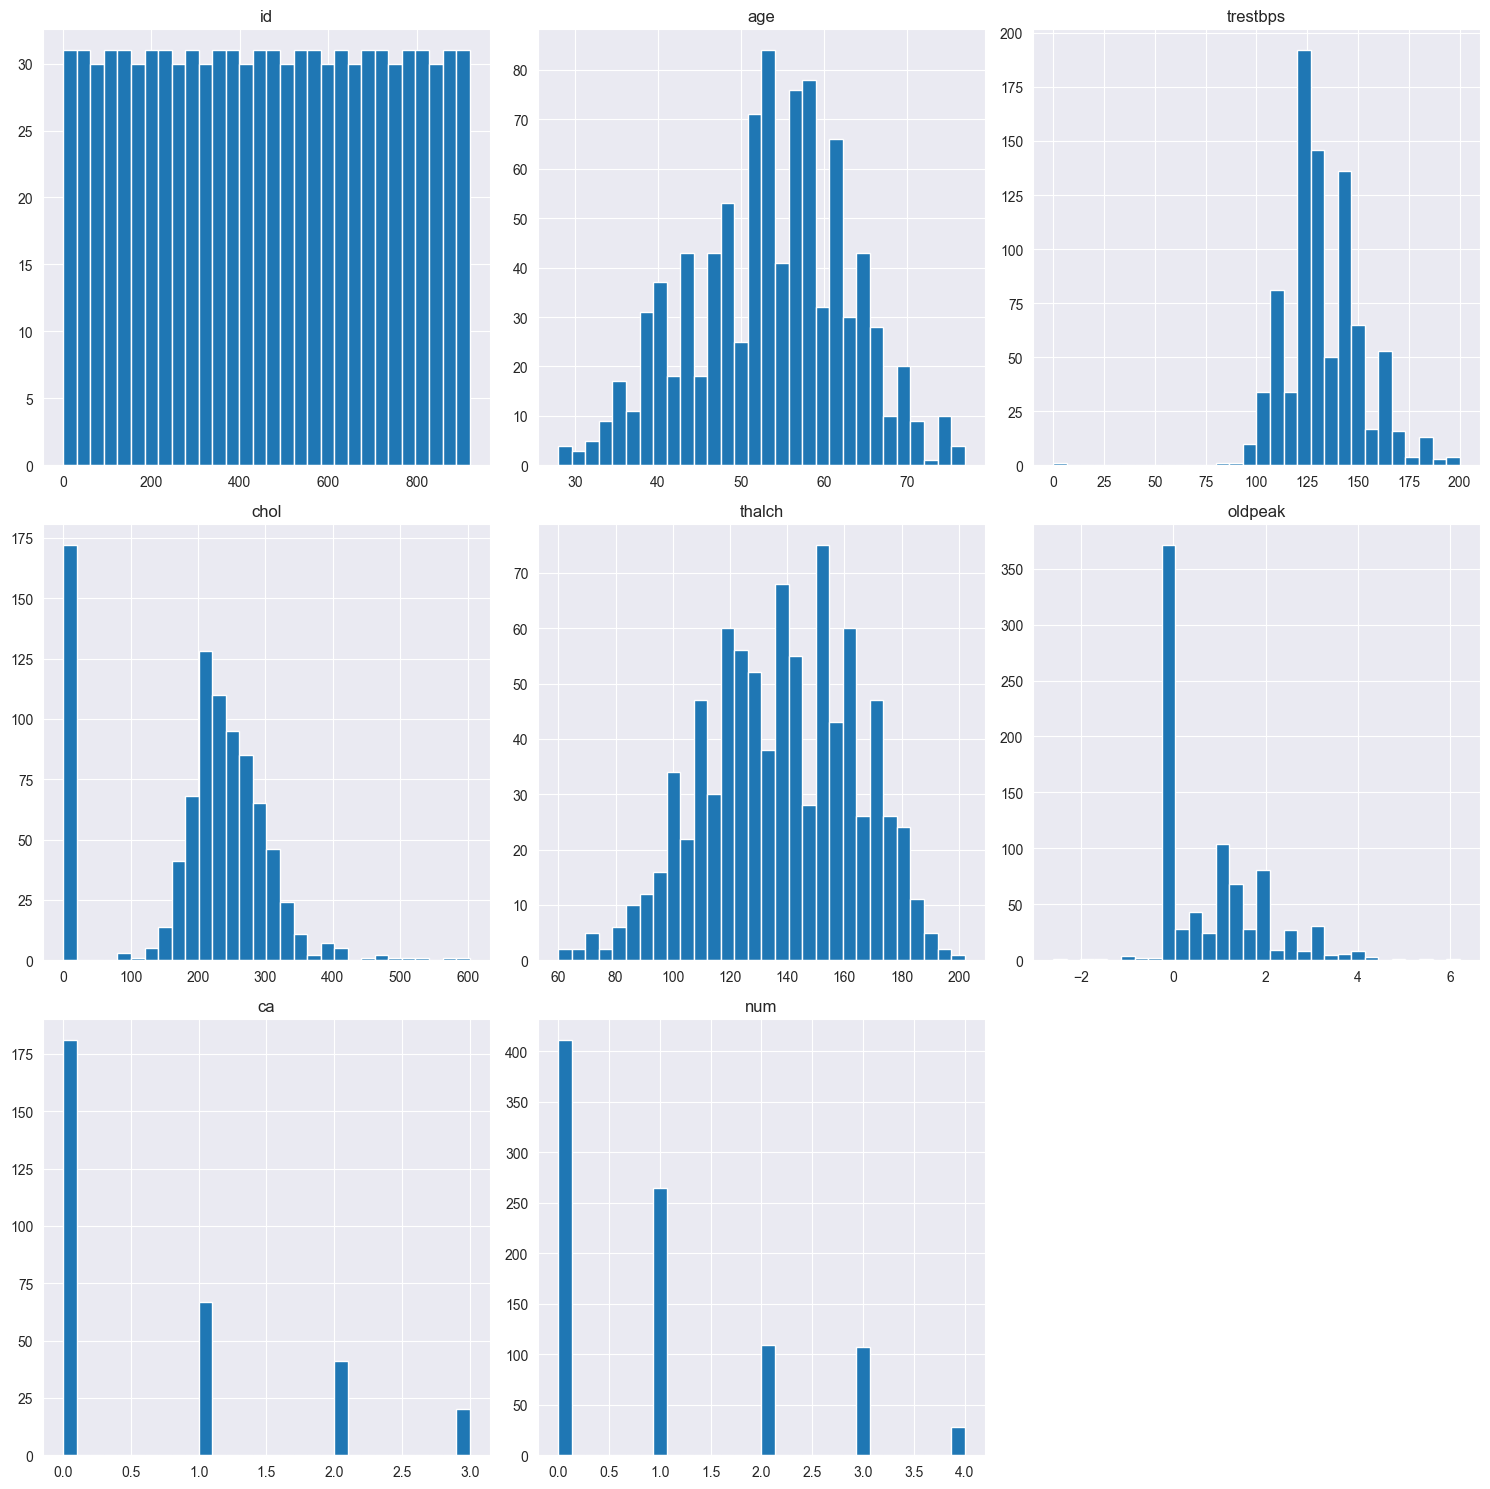

In [17]:
# checking the distrbution of each numerical col using histgram
sns.set_style("dark")
df.hist(figsize=(15, 15), bins = 30)
plt.tight_layout()

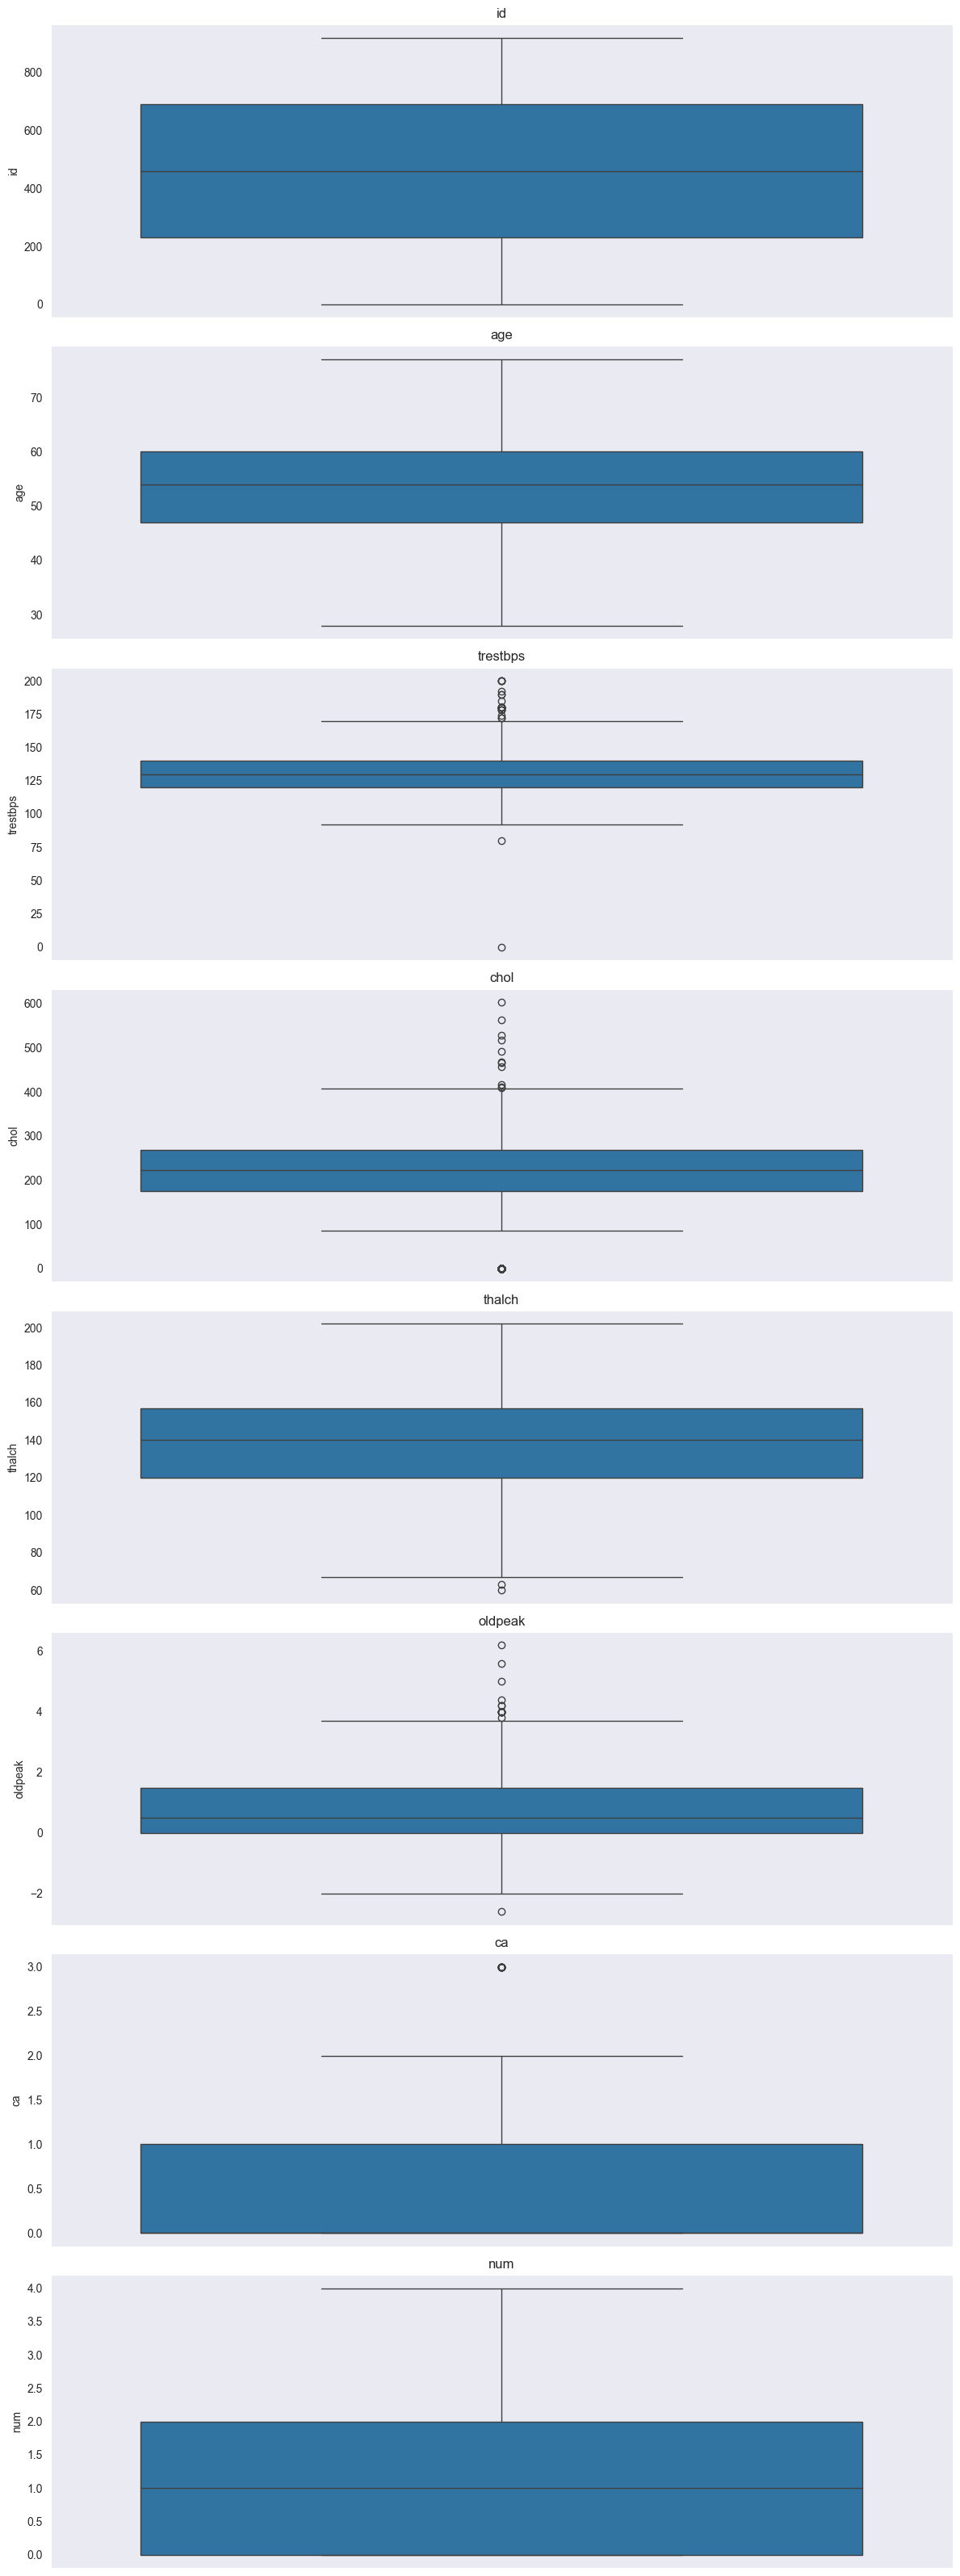

In [18]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

rows = len(num_cols)

plt.figure(figsize=(12, rows * 4)) 

i = 1
for col in num_cols:
    plt.subplot(rows, 1, i)
    sns.boxplot(y=df[col])
    plt.title(col, fontsize=12)
    i += 1

plt.tight_layout()

In [19]:
def count_outliers(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return ((col < lower) | (col > upper)).sum()

outliers_df = (
    df[num_cols]
    .apply(count_outliers)
    .reset_index()
    .rename(columns={'index': 'Column', 0: 'Outliers_Count'})
    .sort_values(by="Outliers_Count", ascending=False)
    .reset_index(drop=True)
)

outliers_df['percentage %'] = [round((col / len(df)) * 100 , 2) for col in outliers_df['Outliers_Count']]
outliers_df

,Column,Outliers_Count,percentage %
0,chol,183,19.89
1,trestbps,28,3.04
2,ca,20,2.17
3,oldpeak,16,1.74
4,thalch,2,0.22
5,age,0,0.00
6,id,0,0.00
7,num,0,0.00


# Data Cleaning

In [20]:
def data_cleaning(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.strip()
    
    # deleting all the irrelative columns
    del df['id']
    del df['dataset']
    
    # ---------------------------
    
    # detect the right datatype of each column
    df['fbs'] = df['fbs'].astype(object)
    df['exang'] = df['exang'].astype(object)
    
    #---------------------------------------
    
    
    # filling the null values
    
    # for trestbps feature it has 59 null values and it's numerical feature and it's has outliers
    df['trestbps'] = df['trestbps'].fillna(df['trestbps'].median())
    
    # for feature chol it has 30 null values and it's numerical feature and it's has alot of outliers
    df['chol'] = df['chol'].fillna(df['chol'].median())
    
    # for feature fbs it has 90 null values and it's categorical feature 
    df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
    
    # for feature restecg it has 2 null values and it's categorical feature
    df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])
    
    # for feature thalch it has 55 null values and it's numerical feature
    df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
    
    # for feature exang it has 55 null values and it's categorical feature
    df['exang'] = df['exang'].fillna(df['exang'].mode()[0])
    
    # for feature oldpeak it has 62 null values and it's numerical feature and it has outliers
    df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())
    
    # for feature slope it has 300 null values and it's categorical feature
    df['slope'] = df['slope'].fillna(df['slope'].mode()[0])
    
    # for feature ca feature delete it 
    del df['ca']
    
    # for feature thal it has 490 null values and it's categorical feature
    df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
    
    # ------------------------------------------------
    
    # making the label two classes instead of 5
    label_values = {0 : 0, 1 : 1, 2 : 1, 3: 1, 4 : 1}
    df['num'] = df['num'].map(label_values)
    # ------------------------------------
    
    # then, for chol it has alot of outliers 
    df['chol'] = np.log1p(df['chol'])
    
    # --------------------------------
    
    
    # cleaning the text in the categorical features
    cat_cols = df.select_dtypes(include = ['object'])
    for col in cat_cols:
        df[col] = df[col].str.lower().str.replace(' ', '_').str.strip()
    
    return df

In [21]:
df = data_cleaning(df)

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,male,typical_angina,145.0,5.455321,True,lv_hypertrophy,150.0,False,2.3,downsloping,fixed_defect,0
1,67,male,asymptomatic,160.0,5.659482,False,lv_hypertrophy,108.0,True,1.5,flat,normal,1
2,67,male,asymptomatic,120.0,5.438079,False,lv_hypertrophy,129.0,True,2.6,flat,reversable_defect,1
3,37,male,non-anginal,130.0,5.525453,False,normal,187.0,False,3.5,downsloping,normal,0
4,41,female,atypical_angina,130.0,5.323010,False,lv_hypertrophy,172.0,False,1.4,upsloping,normal,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    bool   
 6   restecg   920 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    bool   
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    object 
 11  thal      920 non-null    object 
 12  num       920 non-null    int64  
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 81.0+ KB


In [24]:
# working on fbs and exang
fbs_values = {True : 1, False : 0}
exang_values = {True : 1, False : 0}

# appling the change
df['fbs'] = df['fbs'].map(fbs_values)
df['exang'] = df['exang'].map(exang_values)

In [25]:
df['fbs'] = df['fbs'].astype(object)
df['exang'] = df['exang'].astype(object)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    object 
 11  thal      920 non-null    object 
 12  num       920 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 93.6+ KB


# Splitting The Data

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['num'])
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test)

(736, 184)

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
880,62,male,asymptomatic,130.0,5.141664,0,st-t_abnormality,120.000000,1,3.0,flat,normal
457,54,male,non-anginal,150.0,5.411646,0,normal,122.000000,0,0.0,flat,normal
797,51,male,non-anginal,130.0,5.828946,0,normal,137.545665,0,0.5,flat,normal
25,50,female,non-anginal,120.0,5.393628,0,normal,158.000000,0,1.6,flat,normal
84,52,male,atypical_angina,120.0,5.786897,0,normal,172.000000,0,0.2,upsloping,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
106,59,male,asymptomatic,140.0,5.181784,0,normal,162.000000,1,0.0,upsloping,reversable_defect
270,61,male,asymptomatic,140.0,5.337538,0,lv_hypertrophy,138.000000,1,1.9,upsloping,reversable_defect
860,75,male,asymptomatic,160.0,5.739793,1,normal,112.000000,1,2.0,downsloping,reversable_defect
435,53,female,atypical_angina,140.0,5.379897,0,normal,142.000000,1,2.0,flat,normal


In [29]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
319,36,male,atypical_angina,120.0,5.117994,0,normal,180.0,0,0.0,flat,normal
377,45,male,atypical_angina,140.0,5.416100,1,normal,122.0,0,0.0,flat,normal
538,48,male,asymptomatic,160.0,5.799093,0,normal,92.0,1,1.5,flat,normal
296,59,male,asymptomatic,164.0,5.176150,1,lv_hypertrophy,90.0,0,1.0,flat,fixed_defect
531,40,female,asymptomatic,150.0,5.973810,0,normal,130.0,0,2.0,flat,fixed_defect
...,...,...,...,...,...,...,...,...,...,...,...,...
382,46,male,atypical_angina,140.0,5.620401,0,normal,165.0,1,0.0,flat,normal
97,60,female,asymptomatic,150.0,5.556828,0,lv_hypertrophy,157.0,0,2.6,flat,reversable_defect
906,61,male,non-anginal,120.0,5.823046,0,normal,98.0,1,0.0,flat,normal
467,55,male,asymptomatic,120.0,5.602119,0,normal,140.0,0,0.0,flat,normal


# Feature Importance

In [30]:
# for categorical feature 

# p_value lower than 0.05 the feature is important otherwise maybe important or not

from scipy.stats import chi2_contingency

most_imp = []

for col in X_train.columns:
    table = pd.crosstab(X_train[col], y_train)
    chi2, p, dof, exp = chi2_contingency(table)
    if p < 0.05:
        most_imp.append(col)
        
most_imp

['age',
 'sex',
 'cp',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal']

In [31]:
# to see how the label status being changing with the features

# each features has categories if the status cause a real diff in each category so the feature is important otherwise it's not

cat_cols = df.select_dtypes(include=['object'])

global_status_rate = df['num'].mean()
results = []

for col in cat_cols:
    status_by_cat = df.groupby(col)['num'].mean()
    ratio = status_by_cat / global_status_rate
    
    temp_df = pd.DataFrame({
        'Category': status_by_cat.index,
        'Churn_Rate': status_by_cat.values,
        'Relative_to_Global': ratio.values,
        'Column': col
    })
    results.append(temp_df)

final_df = pd.concat(results, ignore_index=True)
display(final_df)

,Category,Churn_Rate,Relative_to_Global,Column
0,female,0.257732,0.465842,sex
1,male,0.632231,1.142737,sex
2,asymptomatic,0.790323,1.428481,cp
3,atypical_angina,0.137931,0.249306,cp
4,non-anginal,0.357843,0.646789,cp
5,typical_angina,0.434783,0.785855,cp
6,0,0.530691,0.959205,fbs
7,1,0.681159,1.231172,fbs
8,lv_hypertrophy,0.563830,1.019103,restecg
9,normal,0.515371,0.931515,restecg


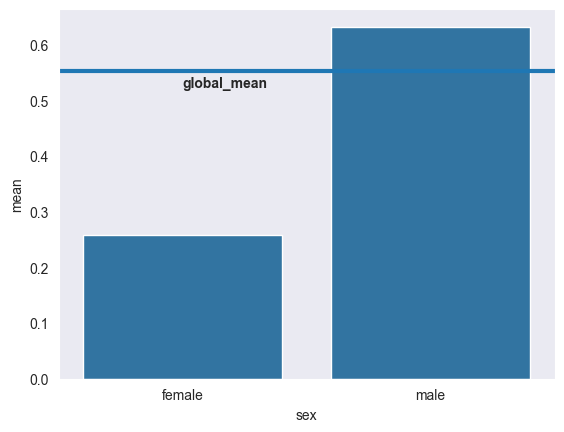

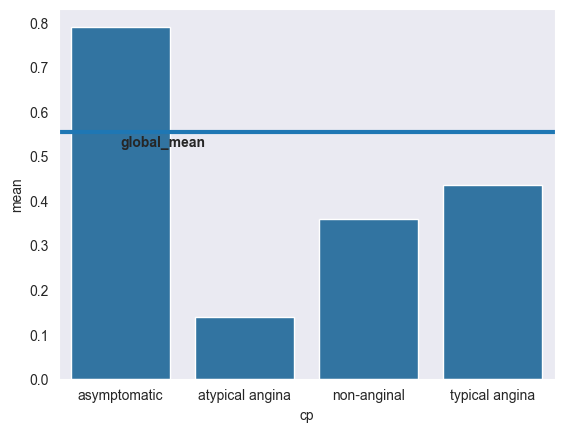

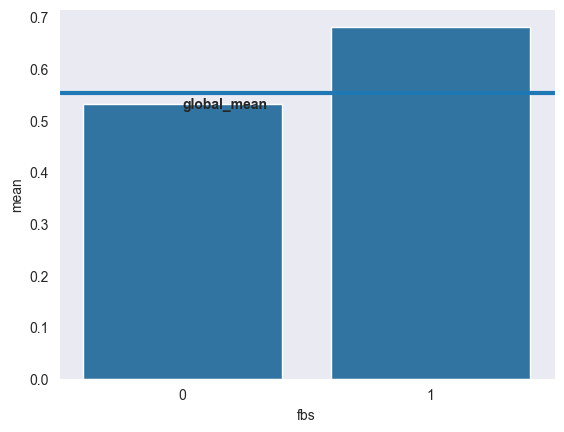

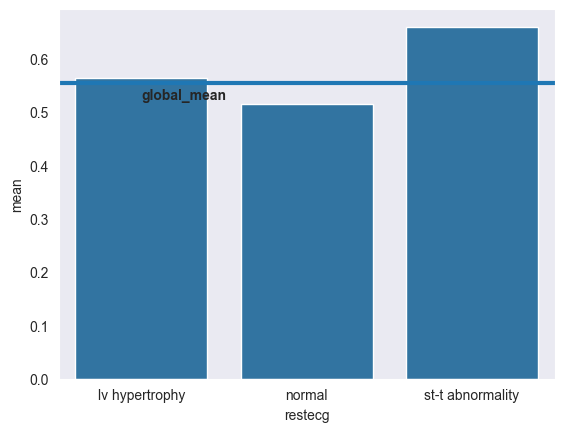

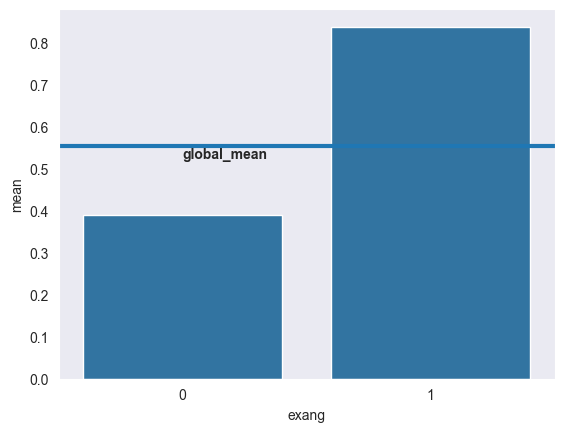

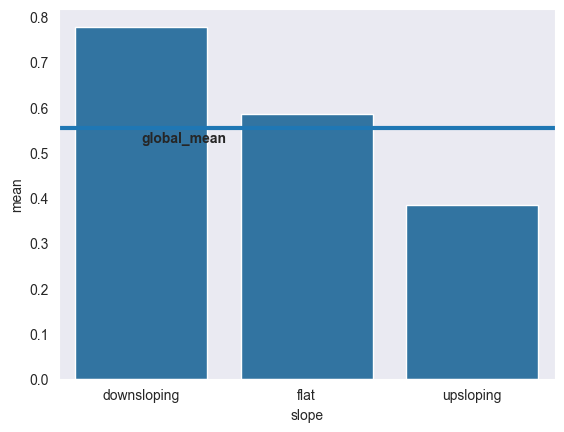

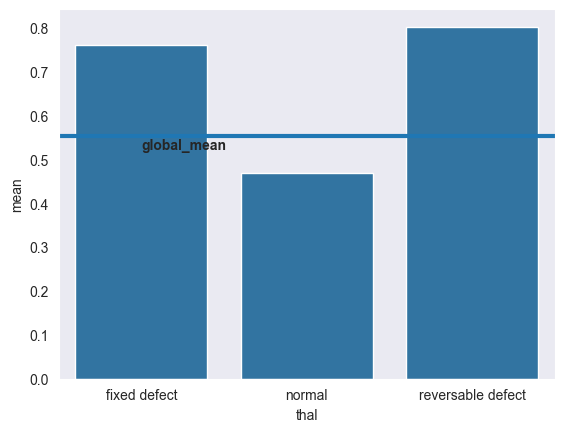

In [32]:
# viewing the same numbers that we got up for better intiution

for feature in cat_cols:
    df_group = df.groupby(by=feature).num.agg(['mean']).reset_index()
    
    df_group[feature] = df_group[feature].astype(str).str.replace('_', ' ', regex=False)
    
    graph = sns.barplot(x=feature, y='mean', data=df_group)
    graph.axhline(global_status_rate, linewidth=3)
    plt.text(0, global_status_rate - 0.03, 'global_mean', weight='semibold')
    plt.show()
    



In [33]:
num_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)
num_cols.remove('num')
num_cols

['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [34]:
# i will need the description of the data to take sane range for the next cell

df.describe().round()

,age,trestbps,chol,thalch,oldpeak,num
count,920.0,920.0,920.0,920.0,920.0,920.0
mean,54.0,132.0,4.0,138.0,1.0,1.0
std,9.0,18.0,2.0,25.0,1.0,0.0
min,28.0,0.0,0.0,60.0,-3.0,0.0
25%,47.0,120.0,5.0,120.0,0.0,0.0
50%,54.0,130.0,5.0,138.0,0.0,1.0
75%,60.0,140.0,6.0,156.0,2.0,1.0
max,77.0,200.0,6.0,202.0,6.0,1.0


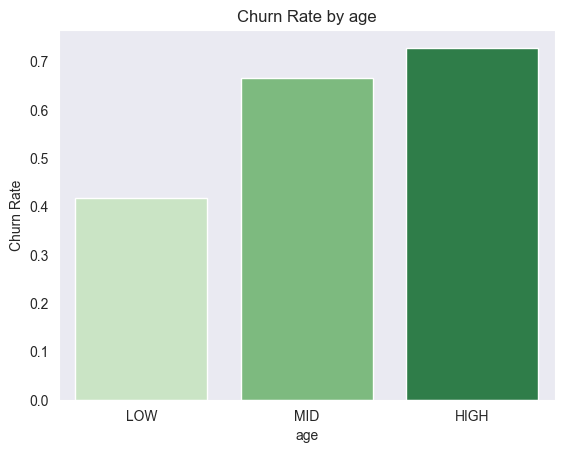

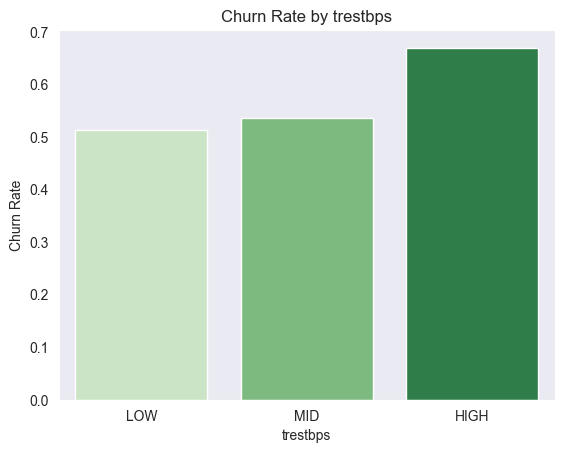

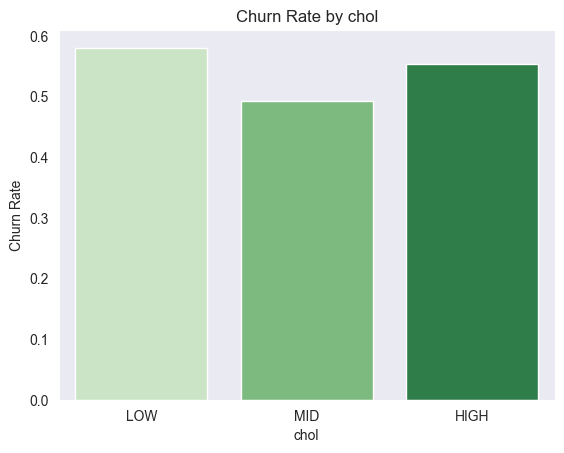

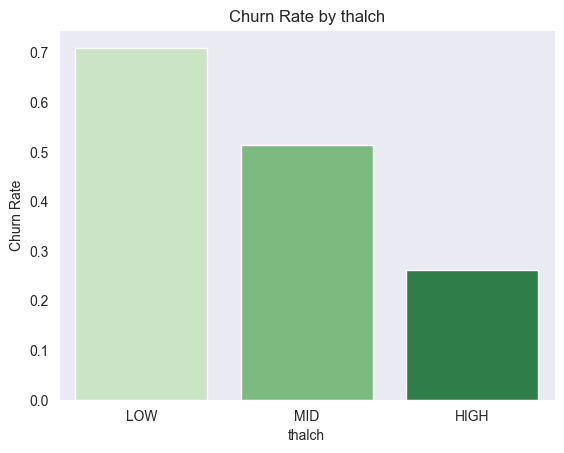

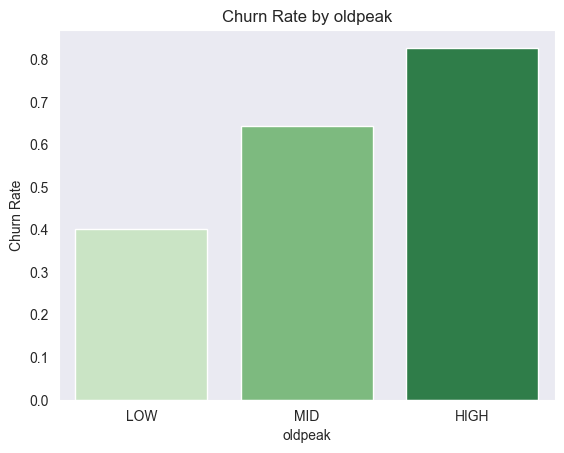

In [35]:
# if you wannna do the same for numerical featrues
# take different ranges and treat it as a category let's dive into this 


for col in num_cols:
    # first range from min to 50%
    x1 = df[df[col] <= df[col].quantile(0.5)].num.mean()
    
    # then, from min to 75%
    x2 = df[(df[col] > df[col].quantile(0.5)) & (df[col] <= df[col].quantile(0.75))].num.mean()
    
    # lastly from 75 to the max
    x3 = df[(df[col] > df[col].quantile(0.75)) & (df[col] <= df[col].max())].num.mean()

    
    sns.barplot(x =['LOW', 'MID', 'HIGH'], y =[x1,x2,x3], palette='Greens');
    plt.title(f'Churn Rate by {col}');
    plt.xlabel(col);
    plt.ylabel('Churn Rate');
    plt.show()

In [36]:
# also for numerical features you can check the linearity relation between target and numerical featrues using correlation

df[num_cols].corrwith(df['num'])

age         0.282700
trestbps    0.101273
chol       -0.306992
thalch     -0.382942
oldpeak     0.366138
dtype: float64

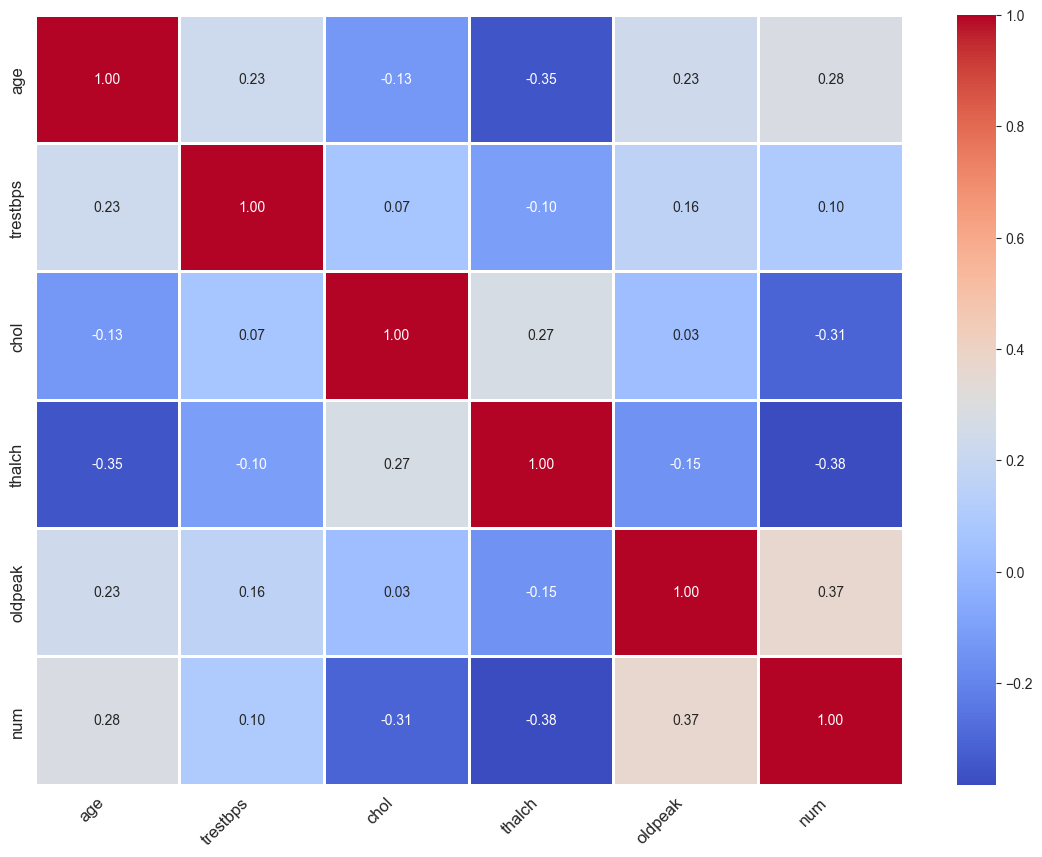

In [37]:
# using corr for numercial features 
# remember that correlation is searching for a linear relation between the features and the target


plt.figure(figsize=(14, 10))  

corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    linewidths=1,
    cmap='coolwarm',
    annot_kws={"size": 10},    
    fmt=".2f"                  
)

plt.xticks(rotation=45, ha='right', fontsize=12)   
plt.yticks(fontsize=12)
plt.show()


#  Feature Importance Using Random Forest

In [38]:

cat_cols = df.select_dtypes(include=['object']).columns
num_cols = [col for col in df.columns if col not in cat_cols]

X_train_enc = pd.get_dummies(X_train, columns=cat_cols, drop_first=True).astype(object)
X_test_enc = pd.get_dummies(X_test, columns=cat_cols, drop_first=True).astype(object)
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

print(len(X_train.columns))
print(len(X_test.columns))

12
12


In [39]:
X_train_enc

,age,trestbps,chol,thalch,oldpeak,sex_male,cp_atypical_angina,cp_non-anginal,cp_typical_angina,fbs_1,restecg_normal,restecg_st-t_abnormality,exang_1,slope_flat,slope_upsloping,thal_normal,thal_reversable_defect
880,62,130.0,5.141664,120.0,3.0,True,False,False,False,False,False,True,True,True,False,True,False
457,54,150.0,5.411646,122.0,0.0,True,False,True,False,False,True,False,False,True,False,True,False
797,51,130.0,5.828946,137.545665,0.5,True,False,True,False,False,True,False,False,True,False,True,False
25,50,120.0,5.393628,158.0,1.6,False,False,True,False,False,True,False,False,True,False,True,False
84,52,120.0,5.786897,172.0,0.2,True,True,False,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,59,140.0,5.181784,162.0,0.0,True,False,False,False,False,True,False,True,False,True,False,True
270,61,140.0,5.337538,138.0,1.9,True,False,False,False,False,False,False,True,False,True,False,True
860,75,160.0,5.739793,112.0,2.0,True,False,False,False,True,True,False,True,False,False,False,True
435,53,140.0,5.379897,142.0,2.0,False,True,False,False,False,True,False,True,True,False,True,False


In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_enc, y_train)

importances = rf.feature_importances_

df_importances = pd.DataFrame({
    'Feature': X_train_enc.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

display(df_importances.head(10))
display(df_importances.tail(10))

display(df_importances)


,Feature,Importance
2,chol,0.150630
3,thalch,0.134341
4,oldpeak,0.115876
0,age,0.107666
12,exang_1,0.103463
1,trestbps,0.086544
6,cp_atypical_angina,0.064813
5,sex_male,0.054277
7,cp_non-anginal,0.036345
15,thal_normal,0.034583


,Feature,Importance
5,sex_male,0.054277
7,cp_non-anginal,0.036345
15,thal_normal,0.034583
10,restecg_normal,0.019133
16,thal_reversable_defect,0.017231
8,cp_typical_angina,0.016928
13,slope_flat,0.015828
9,fbs_1,0.014728
11,restecg_st-t_abnormality,0.013954
14,slope_upsloping,0.013660


,Feature,Importance
2,chol,0.150630
3,thalch,0.134341
4,oldpeak,0.115876
0,age,0.107666
12,exang_1,0.103463
1,trestbps,0.086544
6,cp_atypical_angina,0.064813
5,sex_male,0.054277
7,cp_non-anginal,0.036345
15,thal_normal,0.034583


# Recursive Feature Elimination RFE


In [41]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

# select top 10 feartures
rfe = RFE(estimator=rf, n_features_to_select= 7)
rfe.fit(X_train_enc, y_train)

,estimator,RandomForestC...ndom_state=42)
,n_features_to_select,7
,step,1
,verbose,0
,importance_getter,'auto'
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [42]:
rfe_features = list(X_train_enc.columns[rfe.support_])
rfe_features

['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'sex_male', 'exang_1']

# Preprocessing

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

def preprocessing(X_train, X_test):

    # picking the types 
    num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
    cat_cols = list(X_train.select_dtypes(exclude=['int64', 'float64']).columns)

    # Pipeline for numerical features
    num_pipeline = Pipeline(steps = [
    ('scaler', StandardScaler())
    ])

    # ColumnTransformer 
    preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', num_pipeline, num_cols)
    ]
    )
    

    # fit only on the train 
    X_train_enc = preprocessor.fit_transform(X_train)

    # transform on test
    X_test_enc = preprocessor.transform(X_test)
    
    return X_train_enc, X_test_enc


In [44]:
X_train, X_test = preprocessing(X_train, X_test)


# Classification Models

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score

model = RandomForestClassifier(
    n_estimators= 200,
    random_state= 42, 
    max_depth= 8, 
    min_samples_leaf=4,
    min_samples_split=10,
    max_features='sqrt'
)

model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,8
,min_samples_split,10
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
y_prob_rf = model.predict_proba(X_test)[:, 1]

In [47]:
# detect overfitting
y_pt = model.predict(X_train)
y_ptt = model.predict(X_test)
print(accuracy_score(y_train, y_pt))
print(accuracy_score(y_test, y_ptt))

0.8722826086956522
0.8478260869565217


In [48]:
# using cross validation for ensurence
from sklearn.model_selection import cross_val_score

cv_sorces_rf = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy')
print(f'CV Accuracy {np.mean(cv_sorces_rf)}')

CV Accuracy 0.8030520316234602


In [49]:
thresholds = np.linspace(0, 1, 10)

for t in thresholds:
    y_pred = (y_prob_rf >= t).astype(int)
    print(f'Threshold -> {t}')
    print(classification_report(y_test, y_pred))
    print('*' * 50)

Threshold -> 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.59      1.00      0.74       109

    accuracy                           0.59       184
   macro avg       0.30      0.50      0.37       184
weighted avg       0.35      0.59      0.44       184

**************************************************
Threshold -> 0.1111111111111111
              precision    recall  f1-score   support

           0       1.00      0.29      0.45        75
           1       0.67      1.00      0.80       109

    accuracy                           0.71       184
   macro avg       0.84      0.65      0.63       184
weighted avg       0.81      0.71      0.66       184

**************************************************
Threshold -> 0.2222222222222222
              precision    recall  f1-score   support

           0       0.96      0.60      0.74        75
           1       0.78      0.98      0.87       109


In [50]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=400, 
    max_depth=3,         
    learning_rate=0.01,   
    subsample=0.8,  
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [51]:
cv_sorces_xgb = cross_val_score(xgb_model, X_train, y_train, cv = 5, scoring='accuracy')
print(f'CV Accuracy {np.mean(cv_sorces_xgb)}')

CV Accuracy 0.8179996322853466


In [52]:
# Overfitting
# predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test  = xgb_model.predict(X_test)

# accuracy
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.8627717391304348
Test Accuracy : 0.8260869565217391


In [53]:
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

for t in thresholds:
    y_pred = (y_prob_xgb >= t).astype(int)
    print(f'Threshold -> {t}')
    print(classification_report(y_test, y_pred)) # (y_true, y_pred)
    print('*' * 50)

Threshold -> 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.59      1.00      0.74       109

    accuracy                           0.59       184
   macro avg       0.30      0.50      0.37       184
weighted avg       0.35      0.59      0.44       184

**************************************************
Threshold -> 0.1111111111111111
              precision    recall  f1-score   support

           0       0.92      0.32      0.48        75
           1       0.68      0.98      0.80       109

    accuracy                           0.71       184
   macro avg       0.80      0.65      0.64       184
weighted avg       0.78      0.71      0.67       184

**************************************************
Threshold -> 0.2222222222222222
              precision    recall  f1-score   support

           0       0.96      0.67      0.79        75
           1       0.81      0.98      0.89       109


In [54]:
t = 0.4444
y_pred_xgb = (y_prob_xgb >= t).astype(int)
y_pred_rf = (y_prob_rf >= t).astype(int)

# for xgb model
print("Random Forest")
print('Accuracy ', accuracy_score(y_test, y_pred_xgb))
print("Classification_report ", classification_report(y_test, y_pred_xgb))
print("-" * 50)

# for rf model 
print("XGBOOST")
print('Accuracy ', accuracy_score(y_test, y_pred_rf))
print("Classification_report ", classification_report(y_test, y_pred_rf)) 


Random Forest
Accuracy  0.842391304347826
Classification_report                precision    recall  f1-score   support

           0       0.82      0.79      0.80        75
           1       0.86      0.88      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184

--------------------------------------------------
XGBOOST
Accuracy  0.842391304347826
Classification_report                precision    recall  f1-score   support

           0       0.84      0.76      0.80        75
           1       0.84      0.90      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



# Random Forest final model

## Hyperparameter Tuning

### GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# GridSearch with cross val
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='precision',
    n_jobs=-1,
    verbose=2
)


grid_search.fit(X_train, y_train)

# Best hyperparmeters 
print(f' Best Parameters {grid_search.best_params_}')

# Best model after tuning 
model = grid_search.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
 Best Parameters {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [56]:
# Testing the model on test data
train_pre = model.predict(X_train)
test_pre = model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, train_pre)
test_acc = accuracy_score(y_test, test_pre)

# printing acc of both to see if there is Overfitting
print(f"Train Accuracy {train_acc}")
print(f'Test Accuracy {test_acc}')

Train Accuracy 0.8885869565217391
Test Accuracy 0.8478260869565217


In [57]:

train_prec = precision_score(y_train, train_pre)
test_prec = precision_score(y_test, test_pre)

print("Train Precision:", train_prec)
print("Test Precision :", test_prec)


Train Precision: 0.8822115384615384
Test Precision : 0.8857142857142857


In [58]:
# Classification report

y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.4).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        75
           1       0.85      0.94      0.89       109

    accuracy                           0.86       184
   macro avg       0.87      0.85      0.86       184
weighted avg       0.87      0.86      0.86       184

[[ 57  18]
 [  7 102]]


# Deployment

In [59]:
# first we prepare our pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [60]:
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [61]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [62]:
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [63]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)

In [64]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [65]:
# Preparing the data
X = df.drop(columns=['num'])
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Trying the pipeline
model_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [66]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [67]:
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        79
           1       0.86      0.88      0.87       105

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



### Save the model

In [68]:
import pickle
file_name = 'model.sav'

In [69]:
pickle.dump(model_pipeline, open(file_name, 'wb'))

### Load the model

In [1]:
import pickle
file_name = 'model.sav'

In [2]:
with open(file_name, 'rb') as f_in:
    model = pickle.load(f_in)
    
model

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
